# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat:  Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

Na niniejszych laboratoriach będziemy wykorzystywać bibliotekę `fuzzython`(https://github.com/yudivian/fuzzython). Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby móc z niego zkorzystać należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na delcie), rozpakować go i wrzucić na dysk google, a następnie wykonać poniższą komórkę montującą dysk google:


In [10]:
import sys
from google.colab import drive
drive.mount('/content/drive')
# upewniej się że poniższa ścieżka jest poprawna
path_nb = '/content/drive/My Drive/Colab Notebooks/'
sys.path.append(path_nb)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import zipfile
with zipfile.ZipFile('fuzzython.zip','r') as zip_ref:
  zip_ref.extractall('.')

Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

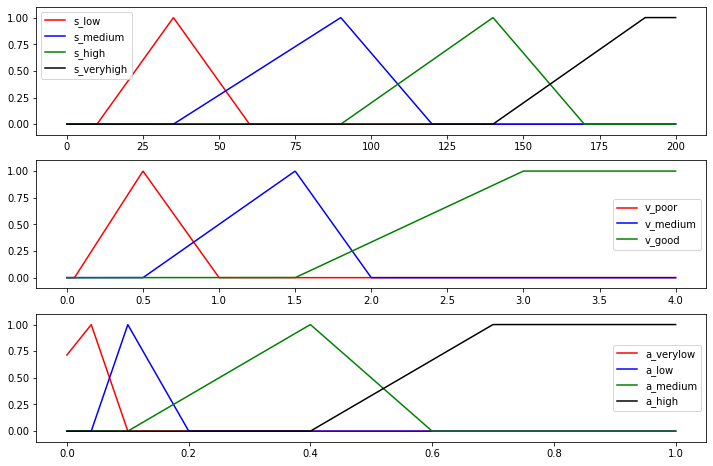

In [47]:
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
import numpy as np
import matplotlib.pyplot as plt
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

# zmienna lingwistyczna `speed` opisujaca predkosc jazdy w skali od 10 do 200 (km/h)
# cztery wartości lingwistyczne, trójkątne zbiory rozmyte: `s_low`, `s_medium`, `s_high`, `s_veryhigh`

s_low = Triangular((9.9,0), (35,1), (60,0))
s_medium = Triangular((35,0), (90,1), (120,0))
s_high = Triangular((90,0), (140,1), (170,0))
s_veryhigh = Triangular((140,0), (190,1), (200,1))
a_s_low = Adjective('s_low', s_low)
a_s_medium = Adjective('s_medium', s_medium)
a_s_high = Adjective('s_high', s_high)
a_s_veryhigh = Adjective('s_veryhigh', s_veryhigh)
speed = Variable('speed', 'km/h', a_s_low, a_s_medium, a_s_high, a_s_veryhigh)

# zmienna lingwistyczna `vysibility` (pisana przez y aby 'is' nie wystepowalo) opisująca widoczność na drodze w skali od 0.05 do 4 (km)
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `v_poor`, `v_medium`, `v_good`

v_poor = Triangular((0.05,0), (0.5,1), (1,0))
v_medium = Triangular((0.5,0), (1.5,1), (2,0))
v_good = Triangular((1.5,0), (3,1), (4,1))
a_v_poor = Adjective('v_poor', v_poor)
a_v_medium = Adjective('v_medium', v_medium)
a_v_good = Adjective('v_good', v_good)
vysibility = Variable('vysibility', 'km', a_v_poor, a_v_medium, a_v_good)

# zmienna lingwistyczna `accident` opisująca prawdopodobienstwo wypadku w skali od 0 do 1 
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `a_verylow`, `a_low`, `a_medium`, `a_high`
a_verylow = Triangular((-0.1,0), (0.04,1), (0.1,0))
a_low = Triangular((0.04,0), (0.1,1), (0.2,0))
a_medium = Triangular((0.1,0), (0.4,1), (0.6,0))
a_high = Triangular((0.4,0), (0.7,1), (1,1))
a_a_verylow = Adjective('a_verylow', a_verylow)
a_a_low = Adjective('a_low', a_low)
a_a_medium = Adjective('a_medium', a_medium)
a_a_high = Adjective('a_high', a_high)
accident = Variable('accident', '%', a_a_verylow, a_a_low, a_a_medium, a_a_high, defuzzification='COG', default=0)

# wykresy poglądowe
x = np.linspace(0,10,1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, s_low, 20*x, 'r', label='s_low')
plot_fuzzyset(ax1, s_medium, 20*x, 'b', label='s_medium')
plot_fuzzyset(ax1, s_high, 20*x, 'g', label='s_high')
plot_fuzzyset(ax1, s_veryhigh, 20*x, 'k', label='s_veryhigh')
plot_fuzzyset(ax2, v_poor, 0.4*x, 'r', label='v_poor')
plot_fuzzyset(ax2, v_medium, 0.4*x, 'b', label='v_medium')
plot_fuzzyset(ax2, v_good, 0.4*x, 'g', label='v_good')
plot_fuzzyset(ax3, a_verylow, 0.1*x, 'r', label='a_verylow')
plot_fuzzyset(ax3, a_low, 0.1*x, 'b', label='a_low')
plot_fuzzyset(ax3, a_medium, 0.1*x, 'g', label='a_medium')
plot_fuzzyset(ax3, a_high, 0.1*x, 'k', label='a_high')
plt.show()

In [48]:
from fuzzython.ruleblock import RuleBlock

scope = locals()

rule1 = 'if speed is a_s_low and vysibility is a_v_good then accident is a_a_verylow'
rule2 = 'if speed is a_s_low then accident is a_a_low'
rule3 = 'if speed is a_s_medium and vysibility is a_v_medium then accident is a_a_low'
rule4 = 'if vysibility is a_v_good then accident is a_a_low'
rule5 = 'if speed is a_s_high then accident is a_a_high'
rule6 = 'if speed is a_s_high and vysibility is a_v_poor then accident is a_a_high'
rule7 = 'if speed is a_s_veryhigh then accident is a_a_high'


block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, rule4, rule5, rule6, rule7, scope=scope)

In [49]:
#Tworzenie sterownika rozmytego mamadaniego
from fuzzython.systems.mamdani import MamdaniSystem

mamdani = MamdaniSystem('mamdani_model', block)

In [50]:
# dane wejściowe
inputs = {'speed': 70, 'vysibility': 3} #speed (10-200), vysibility(0.05-4)
# obliczenie odpowiedzi
res = mamdani.compute(inputs)
#zwraca słownik
res

{'rb_mamdani': {'accident': 0.11333333333333336}}

reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty sequence with no initial value
reduce() of empty se

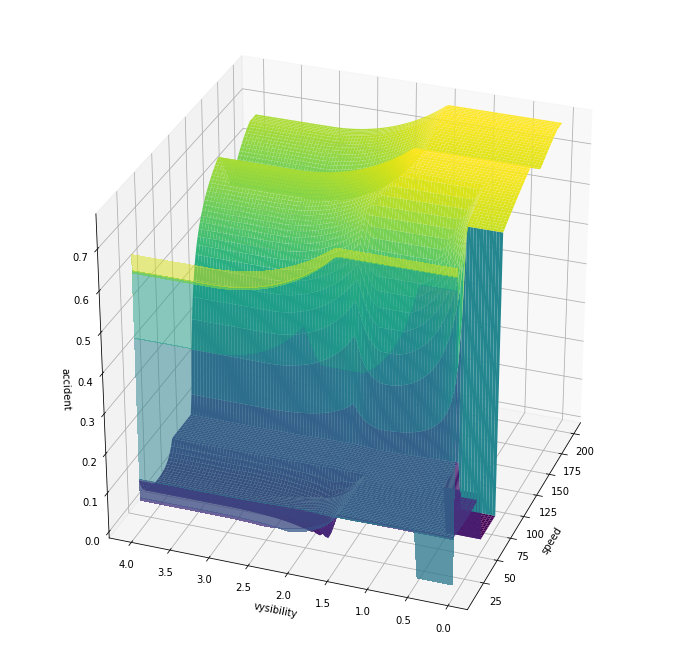

In [68]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from functools import reduce
# przygotowanie siatki
sampledx = np.linspace(10, 200, 100)
sampledy = np.linspace(0.05, 4, 100)
x, y = np.meshgrid(sampledx, sampledy)
z = np.zeros((len(sampledx),len(sampledy)))

for i in range(len(sampledx)):
    for j in range(len(sampledy)):
        inputs = {'speed': x[i, j], 'vysibility': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['accident']
        
            
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('speed')
ax.set_ylabel('vysibility')
ax.set_zlabel('accident')
ax.view_init(30, 200)

## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

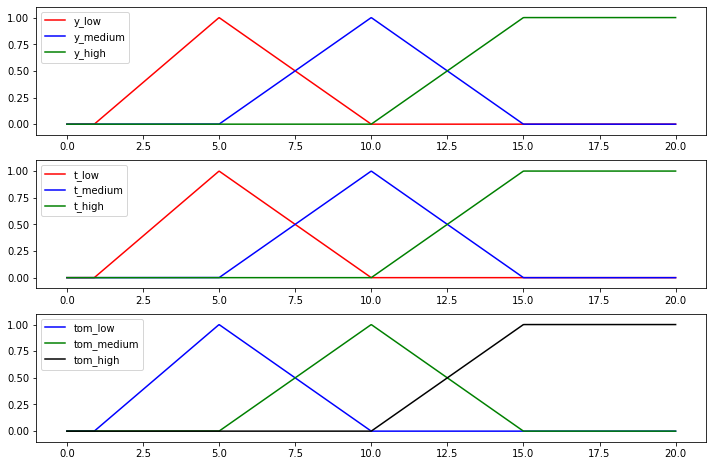

In [72]:
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
import numpy as np
import matplotlib.pyplot as plt
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

y_low = Triangular((0.9,0), (5,1), (10,0))
y_medium = Triangular((5,0), (10,1), (15,0))
y_high = Triangular((10,0), (15,1), (20,1))
a_y_low = Adjective('y_low', y_low)
a_y_medium = Adjective('y_medium', y_medium)
a_y_high = Adjective('y_high', y_high)
yesterday = Variable('yesterday', 'zl', a_y_low, a_y_medium, a_y_high)

t_low = Triangular((0.9,0), (5,1), (10,0))
t_medium = Triangular((5,0), (10,1), (15,0))
t_high = Triangular((10,0), (15,1), (20,1))
a_t_low = Adjective('t_low', t_low)
a_t_medium = Adjective('t_medium', t_medium)
a_t_high= Adjective('t_good', t_high)
today= Variable('today', 'zl', a_t_low, a_t_medium, a_t_high)

tom_low = Triangular((0.9,0), (5,1), (10,0))
tom_medium = Triangular((5,0), (10,1), (15,0))
tom_high = Triangular((10,0), (15,1), (20,1))
a_tom_low = Adjective('tom_low', tom_low)
a_tom_medium = Adjective('tom_medium', tom_medium)
a_tom_high = Adjective('tom_high', tom_high)
tomorrow = Variable('accident', '%', a_tom_low, a_tom_medium, a_tom_high, defuzzification='COG', default=0)

# wykresy poglądowe
x = np.linspace(0,20,1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, y_low, x, 'r', label='y_low')
plot_fuzzyset(ax1, y_medium, x, 'b', label='y_medium')
plot_fuzzyset(ax1, y_high, x, 'g', label='y_high')
plot_fuzzyset(ax2, t_low, x, 'r', label='t_low')
plot_fuzzyset(ax2, t_medium, x, 'b', label='t_medium')
plot_fuzzyset(ax2, t_high, x, 'g', label='t_high')
plot_fuzzyset(ax3, tom_low, x, 'b', label='tom_low')
plot_fuzzyset(ax3, tom_medium, x, 'g', label='tom_medium')
plot_fuzzyset(ax3, tom_high, x, 'k', label='tom_high')
plt.show()

In [73]:
scope = locals()
rule8 = 'if yesterday is a_y_low and today is a_t_low then tomorrow=yesterday*0.5+today*0.5+0.1'
rule9 = 'if yesterday is a_y_low and today is a_t_medium then tomorrow=yesterday*0.4+today*0.6+0.2'
rule10 = 'if yesterday is a_y_low and today is a_t_high then tomorrow=yesterday*0.2+today*0.8+0.4'
rule11 = 'if yesterday is a_y_medium and today is a_t_low then tomorrow=yesterday*0.4+today*0.6-0.2'
rule12 = 'if yesterday is a_y_medium and today is a_t_medium then tomorrow=yesterday*0.5+today*0.5+0.1'
rule13 = 'if yesterday is a_y_medium and today is a_t_high then tomorrow=yesterday*0.2+today*0.8+0.2'
rule14 = 'if yesterday is a_y_high and today is a_t_low then tomorrow=yesterday*0.2+today*0.8-0.4'
rule15 = 'if yesterday is a_y_high and today is a_t_medium then tomorrow=yesterday*0.4+today*0.6-0.2'
rule16 = 'if yesterday is a_y_high and today is a_t_high then tomorrow=yesterday*0.5+today*0.5+0.1'

block = RuleBlock('rb_takagi', operators=('MIN', 'MAX', 'ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, scope=scope)

In [75]:
from fuzzython.systems.sugeno import SugenoSystem
sugeno = SugenoSystem('model_takagi', block)

In [79]:
# dane wejściowe
inputs = {'yesterday': 10, 'today': 15} #(1-20)
# obliczenie odpowiedzi
res = sugeno.compute(inputs)
# zwraca słownik, trochę inaczej niż w mamdani
res

{'rb_takagi': 14.2}

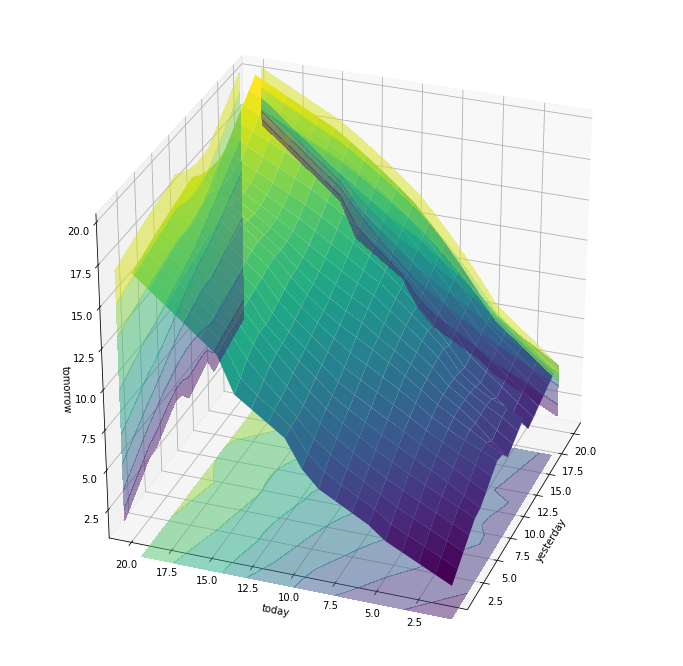

In [80]:
from mpl_toolkits.mplot3d import Axes3D 

sampled = np.linspace(1, 20, 20)
x, y = np.meshgrid(sampled, sampled)
z = np.zeros((len(sampled),len(sampled)))

for i in range(len(sampled)):
    for j in range(len(sampled)):
        inputs = {'yesterday': x[i, j], 'today': y[i, j]}
        res = sugeno.compute(inputs)
        z[i, j] = res['rb_takagi']
            
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 21, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 21, cmap='viridis', alpha=0.5)
ax.set_xlabel('yesterday')
ax.set_ylabel('today')
ax.set_zlabel('tomorrow')
ax.view_init(30, 200)

&copy; Katedra Informatyki, Politechnika Krakowska